<a href="https://colab.research.google.com/github/kipsangchepesa/Final-Project/blob/main/Copy_of_Pump.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PUMP-IT-UP




# Defining the question

## Specific question
The objective is to determine and analyse the factors affecting water point functionality. We will further predict the status of the waterpoint with  factors provided in the data.



#  Understanding Context
 Lack of clean water in Tanzania led the government to  set up various water points around the country by  implementing pumping technology to ensure the availability of clean piped water that is safe for drinking. Over the years, some of these water points have been rendered non-functional mainly as a result of low maintenance.

 Maintenance of these water points will require engineers or maintenance teams to move from one water point to another to check the functionality status which might waste time and resources in case the water points are functional.

# OBJECTIVES

## Main objective
To predict the operating condition of a waterpoint for each record in the dataset.

## Specific objectives
* *To identify the organisations that installed the various water points*
* *To identify the management schemes that manage the various water points*
* *To identify the regions containing the most functional and non-functional water points respectively*
* *To identify the functionality status of water points in the regions with high population*
* *To note the relationship between the functionality status of a water point with the quality of water*
* *To note the relationship between the functionality status of a water point with the type of water extraction*
* *To note the relationship between the functionality status of a water point with the payment status*
* *To note the relationship between the functionality status of a water point with the quantity of water*
* *To note whether the functionality status of a water point is influenced by whether or not the water point has a permit*


## Defining the Metric for Success

To  build model that can correctly classify the waterpoint functionality status

# Experimental Design
Below is the expected workflow:

* Data Cleaning and preparation
 * Loading our libraries and dataset
 * Dealing with missing values
 * Dealing with duplicates

* Performing EDA
 * Univariate Analysis
 * Bivariate Analysis

* Feature Engineering

* Modelling

* Performance Evaluation

* Performance Analysis

* Conclusion

* Recommendations




# Data Relevance
 The Pump it UP dataset is from Taarifa and the Tanzanian Ministry of water
 
[Dataset link](https://drive.google.com/drive/folders/1N6aPcn3T7z6n0QaPrn5PDHhaYXy0_VNh?usp=sharing)


## Data Reading

In [1]:
# Importing the necessary libararies.
import pandas  as pd
import numpy as np # for dealing wiht numbers
import seaborn as sns # for visualization 
import matplotlib.pyplot as plt # plotting 
#table format 
from google.colab import data_table
data_table.enable_dataframe_formatter()

#library for warning function 
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Loading our datasets.
labels = pd.read_csv('/content/Training set labels.csv')
train = pd.read_csv('/content/Training set values.csv')

# Data Exploration

In [3]:
# Previewing the top of our labels dataset.
labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


Our target variable is status group which has three categories: functional, functional needs repair and non_functional.

In [4]:
# Previewing the top of our train dataset
train.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [5]:
# Merging the two datasets.
labels = pd.read_csv('/content/Training set labels.csv')
train = pd.read_csv('/content/Training set values.csv')

df=pd.merge(labels, train, on='id')



In [6]:
# Previewing the top of our merged dataset.

df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,Mnyusi B,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,VWC,Roman,False,1999,gravity,gravity,gravity,vwc,user-group,pay annually,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,Nyamara,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,Other,NaN,True,2010,gravity,gravity,gravity,wug,user-group,never pay,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,gravity,vwc,user-group,pay per bucket,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,VWC,NaN,True,1986,submersible,submersible,submersible,vwc,user-group,never pay,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,Kyanyamisa,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,NaN,NaN,True,0,gravity,gravity,gravity,other,other,never pay,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [7]:
#Checking the dimension of the dataset after merging the train dataset ansd labels.
df.shape

(59400, 41)

The dataset has 59400 rows and 41 columns.

##DATA CLEANING

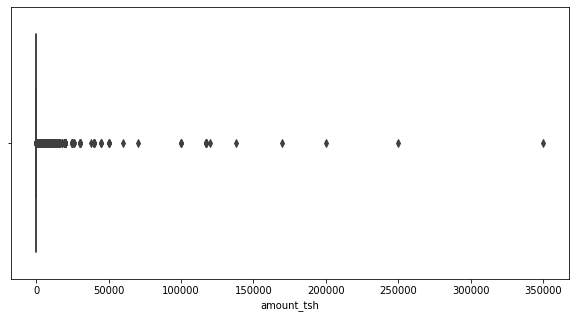

In [8]:
# Checking for outliers.

plt.figure(figsize=(10,5))
sns.boxplot(df['amount_tsh'])

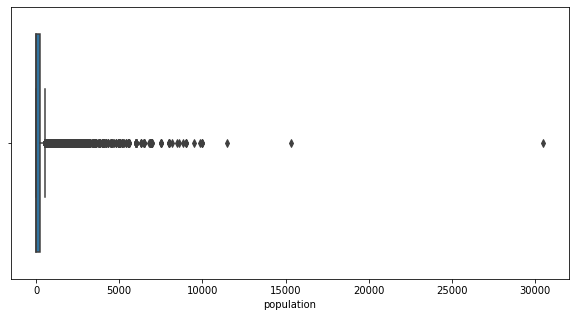

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(df['population'])

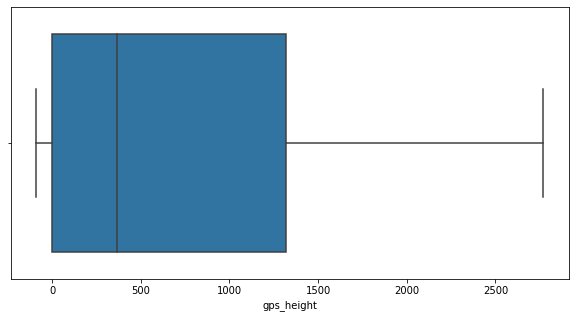

In [10]:
plt.figure(figsize=(10,5))
sns.boxplot(df['gps_height'])

There were outliers detected but we did not remove them being that they were true entries.

In [11]:
# Checking for duplicates.
df.duplicated().sum()


0

There are no duplicates

In [12]:
# Checking for missing values
df.isnull().sum()


id                           0
status_group                 0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_qu

There are several missing values in the following columns:
1. scheme name 
2. public meeting
3. scheme management
4. permit 
5. funder
6. installer.

### Dealing with missing values

In [13]:
# Imputing missing values in the scheme name col with " missing"
df['scheme_name']= df["scheme_name"].fillna("missing")

We impute missing values in the 'scheme_ name' column with the term "missing" because it is the best way of dealing with the null values. Dropping these values will result in loosing a lot of important data thus hindering our prediction analysis.

In [14]:
# Imputation  for funder and installer
df["funder"] = df["funder"].fillna("unknown")
df["installer"] = df["installer"].fillna("unknown")

We fill the installer and funder columns with the term unknown because dropping them will hinder our performance analysis.

In [15]:
# Dropping the rows with missing values in column 'permit' 
df.dropna(inplace= True)

We drop the null values the 'permit' column because they are few and have no significant influence on our analysis if removed.

In [16]:
# Removing unnecessary columns
df.drop(['num_private','waterpoint_type_group','source','quantity_group','payment','extraction_type_group','recorded_by','public_meeting','subvillage'],axis=1, inplace=True)

We drop the columns because they carry the same information as other columns that we have retained.

In [17]:
# Checking the shape of the data
df.shape

(49478, 32)

Our data has 49478  rows and 32 columns

#EDA

##Univariate Analysis

In [18]:
# Statistical summary for the Amount Total Static Head

print("Maximum Total Static Head:", (df["amount_tsh"].max()))
print("Minimum Total Static Head:", (df["amount_tsh"].min()))
print("Mean of the Total Static Head:", (df["amount_tsh"].mean()))
print("Modal Total Static Head:", (df["amount_tsh"].mode()))
print("Median Total Static Head:", (df["amount_tsh"].median()))

Maximum Total Static Head: 250000.0
Minimum Total Static Head: 0.0
Mean of the Total Static Head: 354.7999191559885
Modal Total Static Head: 0    0.0
dtype: float64
Median Total Static Head: 0.0


The maximum TSH is 250,000 , the mean is 354 and most of the waterpoints are empty given that the modal TSH is 0.

In [19]:
# Statistical summary of GPS Height 

print("Maximum gps height:", (df["gps_height"].max()))
print("Minimum gps height:", (df["gps_height"].min()))
print("Mean gps height:", (df["gps_height"].mean()))
print("Median gps height:", (df["gps_height"].median()))
print("Modal gps height:", (df["gps_height"].mode()))

Maximum gps height: 2770
Minimum gps height: -90
Mean gps height: 685.7381462468168
Median gps height: 421.0
Modal gps height: 0    0
dtype: int64


In [20]:
# Creating a copy for Univariate Analysis 
df_eda = df.copy()
df_eda.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,basin,region,region_code,district_code,lga,ward,population,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_class,management,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,Lake Nyasa,Iringa,11,5,Ludewa,Mundindi,109,VWC,Roman,False,1999,gravity,gravity,vwc,user-group,annually,soft,good,enough,spring,groundwater,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,Pangani,Manyara,21,4,Simanjiro,Ngorika,250,VWC,Nyumba ya mungu pipe scheme,True,2009,gravity,gravity,vwc,user-group,per bucket,soft,good,enough,dam,surface,communal standpipe multiple
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,Ruvuma / Southern Coast,Mtwara,90,63,Nanyumbu,Nanyumbu,58,VWC,missing,True,1986,submersible,submersible,vwc,user-group,never pay,soft,good,dry,borehole,groundwater,communal standpipe multiple
5,9944,functional,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,Pangani,Tanga,4,8,Mkinga,Moa,1,VWC,Zingibali,True,2009,submersible,submersible,vwc,user-group,per bucket,salty,salty,enough,other,unknown,communal standpipe multiple
6,19816,non functional,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,Internal,Shinyanga,17,3,Shinyanga Rural,Samuye,0,VWC,missing,True,0,swn 80,handpump,vwc,user-group,never pay,soft,good,enough,borehole,groundwater,hand pump


In [21]:
# Viewing the status groups ratio of the waterpoints.
status= df['status_group'].value_counts()
status

functional                 27178
non functional             18632
functional needs repair     3668
Name: status_group, dtype: int64

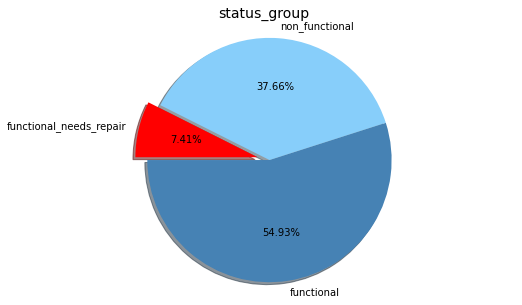

In [22]:
# Visualising the results.

labels= ['functional','non_functional','functional_needs_repair']
colors=['steelblue', 'lightskyblue','red']
fontsize = 14
plt.figure(figsize= (9, 5))
plt.title("status_group", fontsize = fontsize)
plt.pie(status,labels=labels, colors=colors, startangle=180, shadow=True,explode=(0, 0,0.1), autopct='%1.2f%%')
plt.axis('equal')
plt.show()

There were 27178 functional waterpoints representing 54.93% , 8632 non functional waterpoints making 37.66% and 3668 functional waterpoints that need repair  making a total of 7.41%.


In [23]:
# Checking the funders who majorly funded the waterpoints.

df_eda['funder'].value_counts()

Government Of Tanzania    8083
Danida                    2920
Hesawa                    1389
Kkkt                      1260
unknown                   1152
                          ... 
Muwasa                       1
Msigw                        1
Overland High School         1
Kadip                        1
Brown                        1
Name: funder, Length: 1593, dtype: int64

The Government of Tanzania funds the biggest number of water points 8083, while Danida follows at 2920 and Hesawa at 1389 waterpoints.

In [24]:
# Checking the main waterpoint installers.

df_eda['installer'].value_counts()

DWE             14643
Government       1438
unknown          1157
RWE              1031
Commu             893
                ...  
Singida yetu        1
Centra govt         1
HESAWZ              1
CONCE               1
SELEPTA             1
Name: installer, Length: 1788, dtype: int64

DWE makes up about a very high percentage of the Installation followed by the government and RWE.

In [25]:
df_eda['lga'].value_counts()

Njombe           2458
Moshi Rural      1227
Arusha Rural     1173
Kilosa           1063
Kasulu           1042
                 ... 
Kilwa              52
Tarime             39
Ilala              36
Singida Rural      17
Nyamagana           1
Name: lga, Length: 120, dtype: int64

Majority of the waterpoints are located in Njombe, Moshi Rural, Arusha, Kilosa ans Kasulu.

In [26]:

df_eda['wpt_name'].value_counts()

none                       3368
Shuleni                    1373
Zahanati                    640
Msikitini                   463
Kanisani                    266
                           ... 
Kwa Kubembeni                 1
Shule Ya Msingi Milanzi       1
Funua                         1
Sukuzi                        1
Kwa Mzee Lugawa               1
Name: wpt_name, Length: 31776, dtype: int64

3368 waterpoints were not named but those with names such as Shuleni 1373, Zahanati 640, Mzikitini 463, Kanisani 266. This is interesting because the waterpoints names shows their loaction. Those located in schools are 1373, located in dispensaries are 640, mosques are 463 and churches 266.

In [27]:
# Bar plot to show the funding entities
# Creating a user defined function for univariate visuals 
def uni_visuals(column, kind, title, xlabel, ylabel):
  sns.set(font_scale=1.2)
  if kind == 'pie':
    df_eda[column].value_counts().plot(kind=kind, autopct='%1.1f%%', figsize=(7, 6), rot=90)
  elif kind == 'bar':
    df_eda[column].value_counts().plot(kind=kind, figsize=(10, 8), rot=90)
  plt.xlabel(xlabel, labelpad=14)
  plt.ylabel(ylabel, labelpad=14)
  plt.title(title, y=1)
  return plt.show()

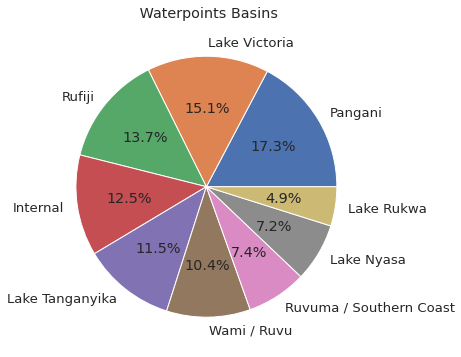

In [28]:
# Bar chart showing whether the basins 
uni_visuals('basin', 'pie', ' Waterpoints Basins', '', '')

Pangani is the largest water basin and the lowest is Lake Rukwa water basin.

In [29]:
# Region counts
df_eda['region'].value_counts()

Iringa           5230
Kilimanjaro      4209
Shinyanga        3701
Mbeya            3525
Morogoro         2960
Kagera           2955
Arusha           2843
Kigoma           2780
Pwani            2626
Tanga            2544
Mwanza           2397
Ruvuma           2116
Tabora           1881
Dodoma           1835
Rukwa            1743
Mtwara           1522
Manyara          1461
Singida          1041
Lindi            1006
Mara              759
Dar es Salaam     344
Name: region, dtype: int64

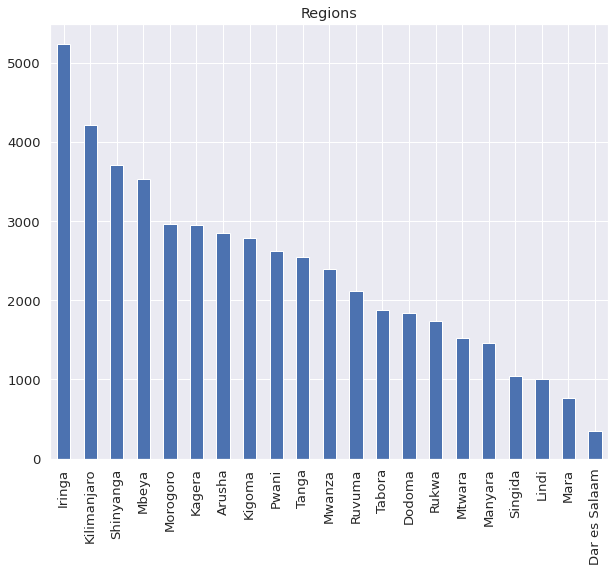

In [30]:
# Bar Chart showing the different regions represented in our dataset 
uni_visuals('region', 'bar', 'Regions', '', '')

Iringa is the geographical location where waterpoints are found and Dar es Salam is the geographical location with least numberr of waterpoints.

In [31]:

df_eda['ward'].value_counts()

Igosi        305
Imalinyi     250
Siha Kati    232
Mdandu       231
Nduruma      204
            ... 
Simbay         1
Matarawe       1
Thawi          1
Kisumwa        1
Ngaya          1
Name: ward, Length: 1891, dtype: int64

Igosi ward has the largest number of waterpoints followed by Imalinyi, Siha Kati,Mdandu and Nduruma. 

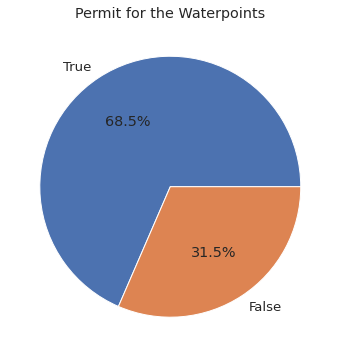

In [32]:
# Pie chart showing whether the different waterpoints require a permit or not
uni_visuals('permit', 'pie', 'Permit for the Waterpoints', '', '')


68.5 % of the waterpoints had permit while 31.5% has no permit.

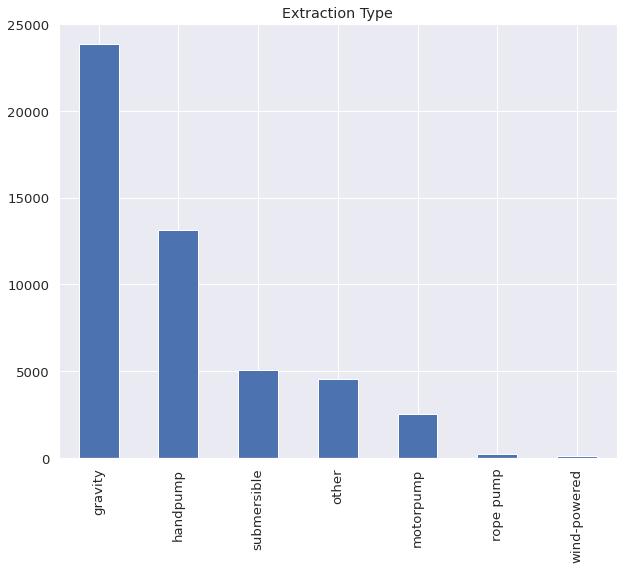

In [33]:
# Bar chart showing the type of Extraction used at the waterpoints
uni_visuals('extraction_type_class', 'bar', 'Extraction Type', '', '')

Gravity was the most used method of water extraction folowed by handpump and wind-powered is the least popular water extraction type 

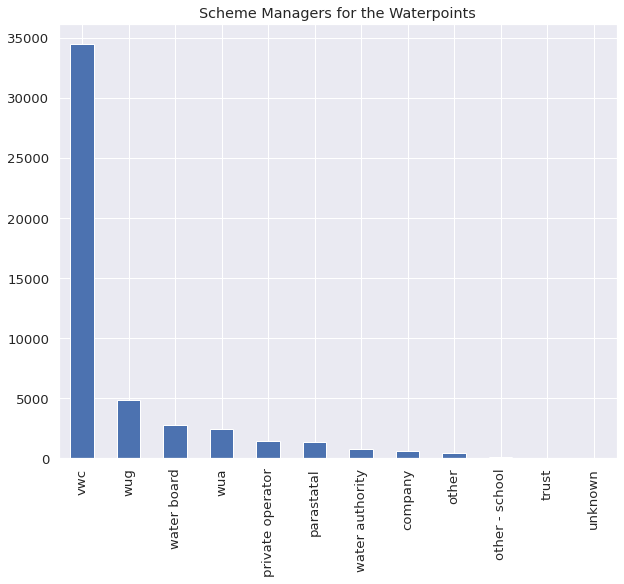

In [34]:
# Bar chart showing the organizations incharge of scheme management
uni_visuals('management', 'bar', 'Scheme Managers for the Waterpoints', '', '')

VWC is in charge of about 70% of the Waterpoints  

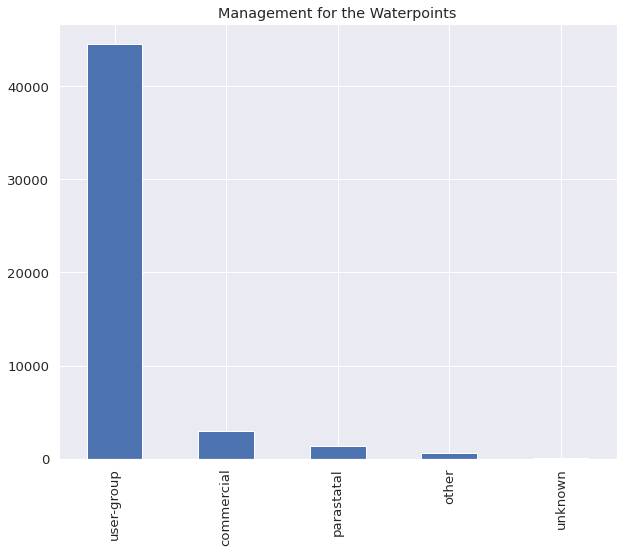

In [35]:
# Bar chart showing the Management Groups for the waterpoints
uni_visuals('management_group', 'bar', 'Management for the Waterpoints', '', '')

90% of the Waterpoints have user-groups as their management groups 

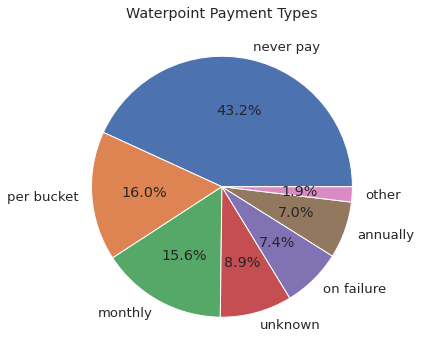

In [36]:

# Pie chart showing the Payment Types
uni_visuals('payment_type', 'pie', 'Waterpoint Payment Types', '', '')


43.2% of the waterpoints are never paid for. This should be investigated further

15.6% of the waterpoints are paid for on a monthly basis whole 16% of them are paid for per bucket

Another aspect that requires further investigation from this analysis is the 8.9% waterpoints whose payment-type is unknown 

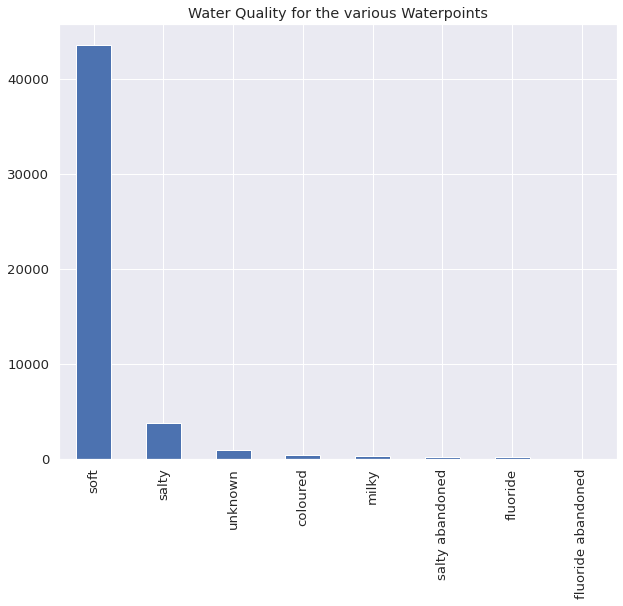

In [37]:
# Bar chart showing the Water quality
uni_visuals('water_quality', 'bar', 'Water Quality for the various Waterpoints', '', '')

88.1% of the Waterpoints have soft water while 7.6% of them have salty water

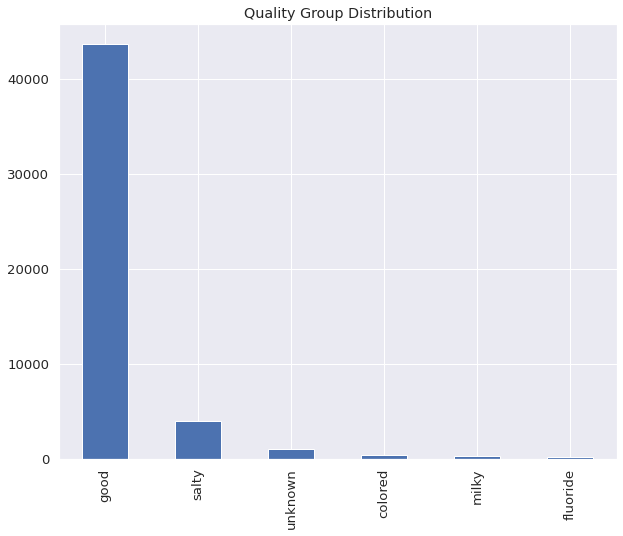

In [38]:

# Bar chart showing the quality groups
uni_visuals('quality_group', 'bar', 'Quality Group Distribution', '', '')

88.1% of the Waterpoints have good quality water

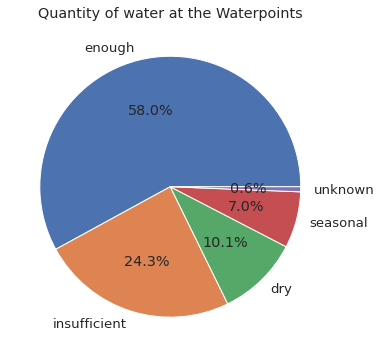

In [39]:

# Pie chart showing the organizations incharge of scheme management
uni_visuals('quantity', 'pie', 'Quantity of water at the Waterpoints', '', '')


58.0% of the waterpoints have enough water while 24.3% of them have insuffient water 

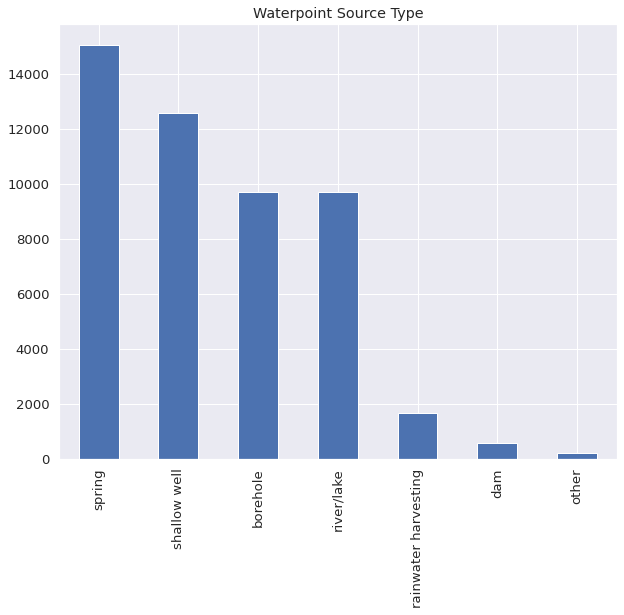

In [40]:

# Bar chart showing the Source types for the waterpoints 
uni_visuals('source_type', 'bar', 'Waterpoint Source Type', '', '')


Spring and Shallow well make up the largest waterpoint source types 

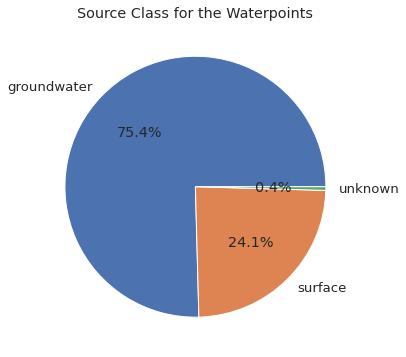

In [41]:

# Pie chart showing the Source Class for the waterpoints 
uni_visuals('source_class', 'pie', 'Source Class for the Waterpoints', '', '')

Groundwater makes up the largest Source Class for the waterpoints at 75.4% while surface water makes up 24.1% 

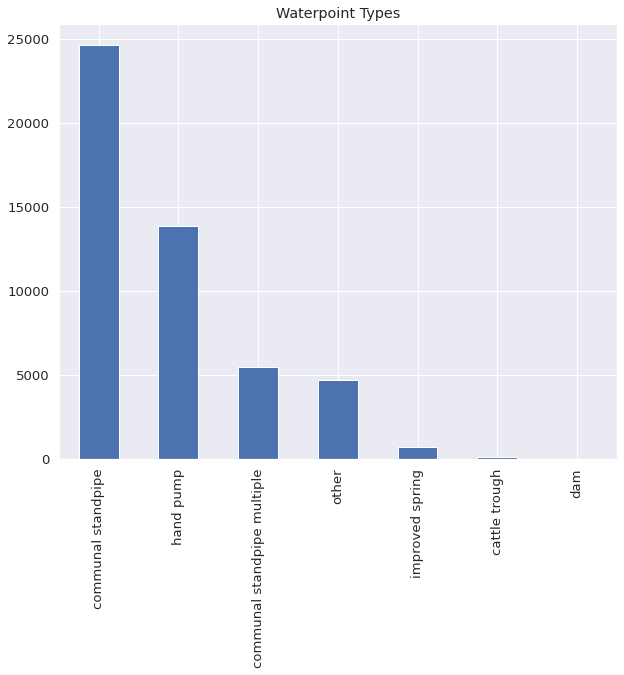

In [42]:
# Pie chart showing the different waterpoint types
uni_visuals('waterpoint_type', 'bar', 'Waterpoint Types', '', '')

The largest waterpoint type is the communal standpipe at 49.8% followed by the handpipe 

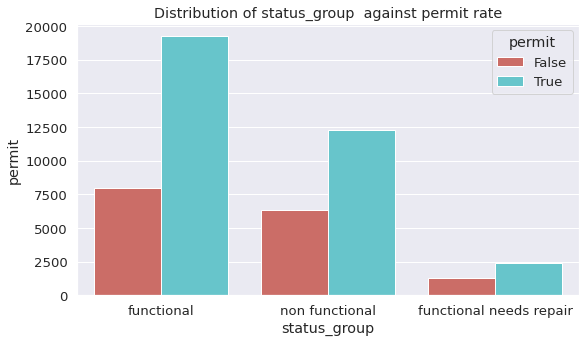

In [43]:
#Stacked column chart for status group  agaist permit rate
plt.figure(figsize=(9, 5))
sns.countplot(x = df["status_group"], hue = df["permit"],palette = ("hls"))
plt.xlabel('status_group')
plt.ylabel('permit')
plt.title('Distribution of status_group  against permit rate') 
plt.show()

## Bivariate Analysis

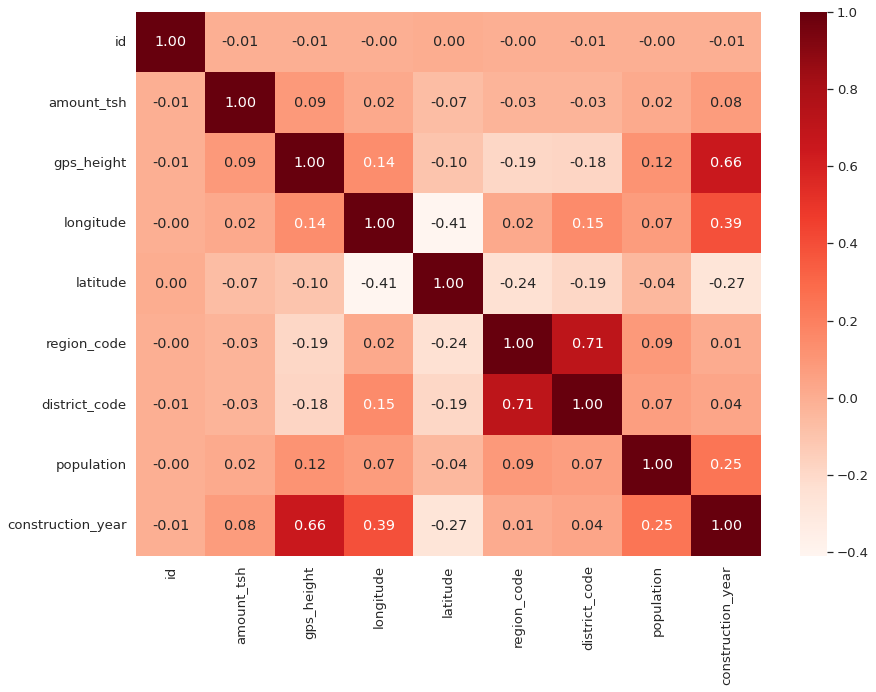

In [44]:
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

There is a high correlation between construction year and gps_height

Text(0, 0.5, 'amount_tsh')

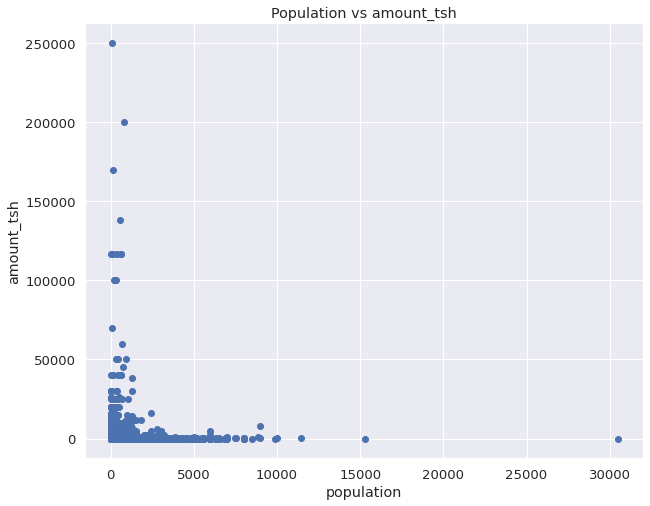

In [45]:
# scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10,8))
plt.scatter(df.population,df.amount_tsh)
# naminng axes
plt.title("Population vs amount_tsh")
plt.xlabel("population")
plt.ylabel("amount_tsh")

Text(0, 0.5, 'amount_tsh')

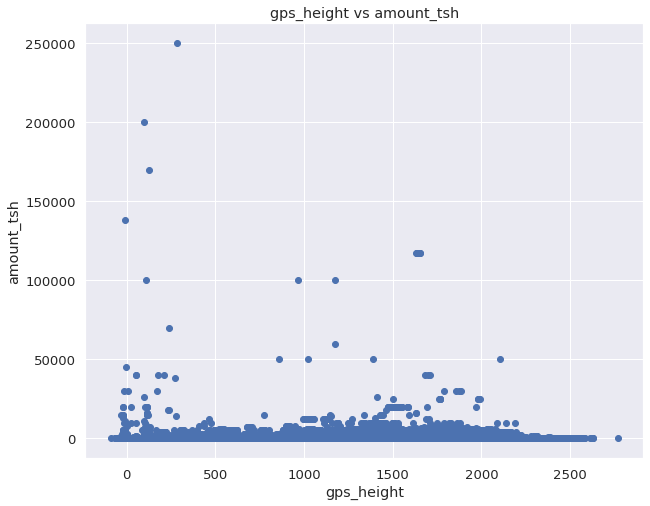

In [46]:
plt.figure(figsize=(10,8))
plt.scatter(df.gps_height, df.amount_tsh)

# labeling
plt.title("gps_height vs amount_tsh")
plt.xlabel('gps_height')
plt.ylabel('amount_tsh')

Text(0, 0.5, 'amount_tsh')

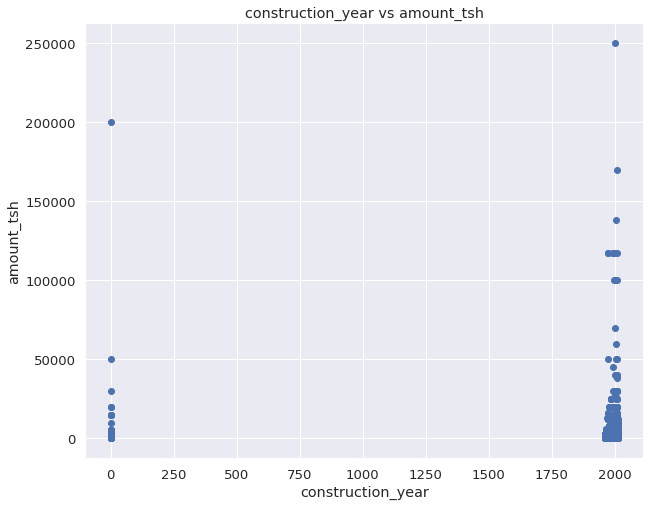

In [47]:
plt.figure(figsize=(10,8))
plt.scatter(df['construction_year'], df['amount_tsh'])

# labeling
plt.title("construction_year vs amount_tsh")
plt.xlabel('construction_year')
plt.ylabel('amount_tsh')

##Categorical verses categorical

1.Relationship between status group and the permit.

In [48]:
pd.crosstab(df['status_group'], df['permit'])

permit,False,True
status_group,,
functional,7956,19222
functional needs repair,1260,2408
non functional,6371,12261


From the results it can be seen that functional waterpoints that require permits are 19929 and those that do not require permits are 88805

It is also noted that functional water points that need repair and require permits are 2495 and 1301 are functional and needs repair and do not require permis to operate in the first place

Finally non funtional waterpoints with permits are 13063 while 6915 waterpoints are non functional but require permits as well

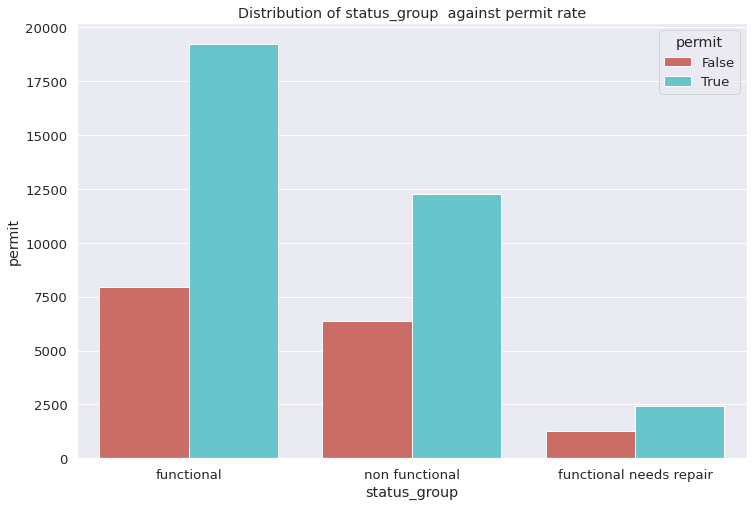

In [49]:
# Visualization of status_ group vs permit
# Stacked column chart for status group  against permit
plt.figure(figsize=(12, 8))
sns.countplot(x = df["status_group"], hue = df["permit"],palette = ("hls"))
plt.xlabel('status_group')
plt.ylabel('permit')
plt.title('Distribution of status_group  against permit rate') 
plt.show()

2 .Relationship between status group and quality of water.

In [50]:
df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name', 'basin',
       'region', 'region_code', 'district_code', 'lga', 'ward', 'population',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_class', 'management',
       'management_group', 'payment_type', 'water_quality', 'quality_group',
       'quantity', 'source_type', 'source_class', 'waterpoint_type'],
      dtype='object')

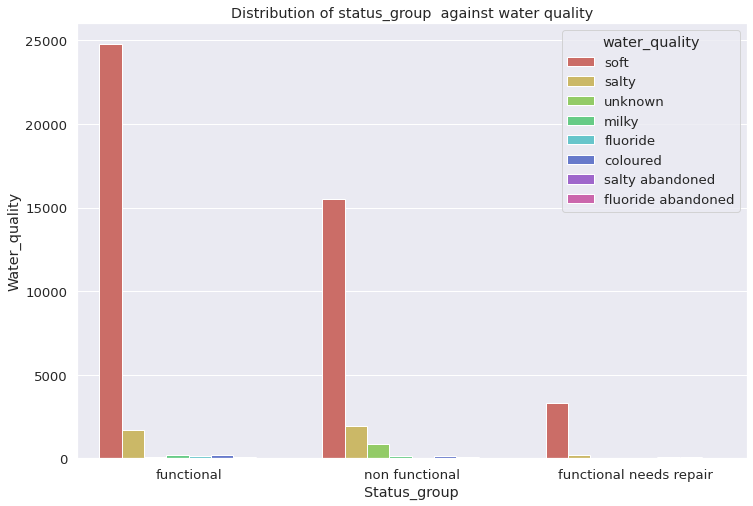

In [51]:
# Stacked column chart for status group  against water quality
plt.figure(figsize=(12, 8))
sns.countplot(x = df["status_group"], hue = df["water_quality"],palette = ("hls"))
plt.xlabel('Status_group')
plt.ylabel('Water_quality')
plt.title('Distribution of status_group  against water quality') 
plt.show()

 1. 25968 functional waterpoints have soft water and 1927 functional waterpoints have salty water.

 2. 3456 functional waterpoints that needs repair have soft water and 185 of functional waterpoints that needs repairs have salty water.

 3. Non functional waterpoints that have soft water are 16455 and 2161 have salty water.

 3. Relationship bewteeen status group and the quantity of water

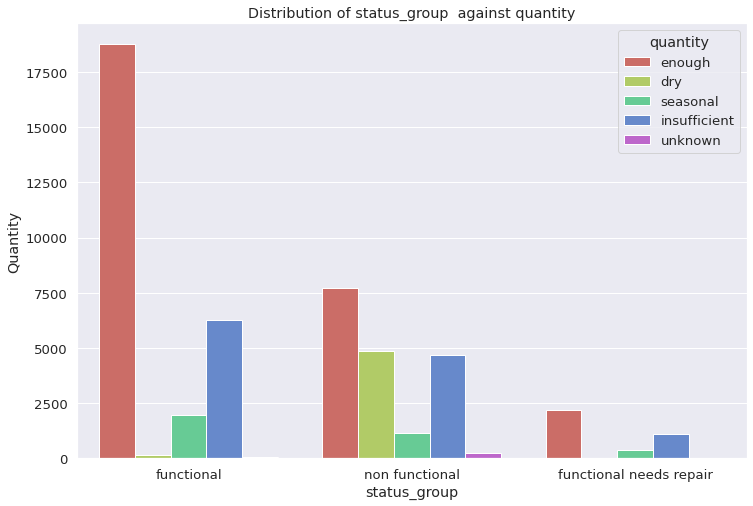

In [52]:
# status group vs quantity
# Stacked column chart for status group  against permit
plt.figure(figsize=(12, 8))
sns.countplot(x = df["status_group"], hue = df["quantity"],palette = ("hls"))
plt.xlabel('status_group')
plt.ylabel('Quantity')
plt.title('Distribution of status_group  against quantity') 
plt.show()

In [53]:
pd.crosstab(df['status_group'], df['quantity'])

quantity,dry,enough,insufficient,seasonal,unknown
status_group,,,,,
functional,127,18770,6255,1962,64
functional needs repair,19,2192,1099,356,2
non functional,4869,7716,4667,1136,244


1. 19891 of the functional waterpoints have enough water, 142 are dry, 6551 are having insufficient water and 2044 are seasonal.

2. 2271 of the functional  waterpoints have enough water needs repair, 19 are dry, 1128 have insufficient water and needs repair and 375 are seasonal and also needs repair.

3. 5403 of the non functional well are dry, 8249 are non funcional and have enough water, 48450 of the non functional waterpoints have insufficient water and 1173 are seasonal.

4. Relationship between the quantity of water and method of extraction.

In [54]:
pd.crosstab(df['quantity'],df['extraction_type_class'])

extraction_type_class,gravity,handpump,motorpump,other,rope pump,submersible,wind-powered
quantity,,,,,,,
dry,1961,982,510,1082,28,436,16
enough,13920,7807,1490,1993,156,3261,51
insufficient,6041,3227,484,1056,19,1162,32
seasonal,1808,1064,26,375,9,170,2
unknown,110,80,4,74,0,39,3


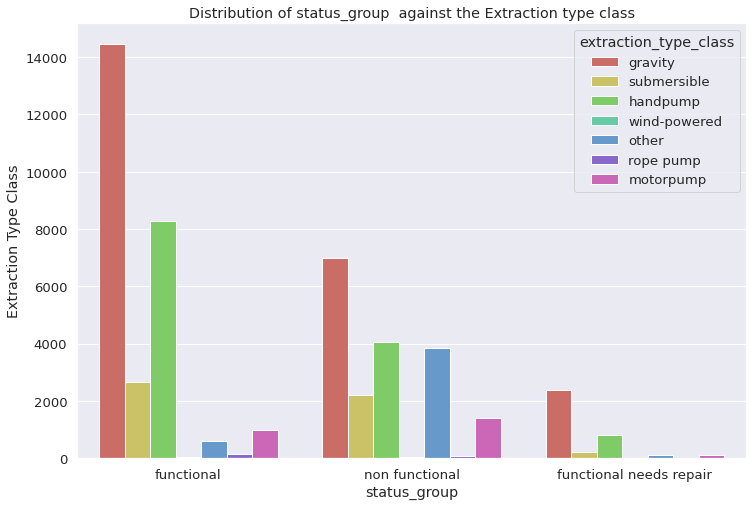

In [55]:
# Stacked column chart for status group  against permit
plt.figure(figsize=(12, 8))
sns.countplot(x = df["status_group"], hue = df["extraction_type_class"],palette = ("hls"))
plt.xlabel('status_group')
plt.ylabel('Extraction Type Class')
plt.title('Distribution of status_group  against the Extraction type class') 
plt.show()

1. for waterpoints that have enough water 14298 uses gravity for extraction,8497 uses handpump,1526 uses motorpump and 3733 uses submisible for extraction.

2. for water points with insufficient water;6191 uses gravity,3403 usee handpump,
 while 1222 uses submercsible.

3. For seasonal waterpoints,1895 uses gravity,1084 uses handpump and 174 uses subersible.

4. gravity and  handpump are mostly used for extration of water from  water points.

 5. Realtionship between the status group and the payment type.

In [56]:
# status group vs payment type
pd.crosstab(df['status_group'], df['payment_type'])

payment_type,annually,monthly,never pay,on failure,other,per bucket,unknown
status_group,,,,,,,
functional,2613,5063,9433,2276,535,5304,1954
functional needs repair,240,897,1509,249,110,374,289
non functional,627,1766,10414,1121,288,2250,2166


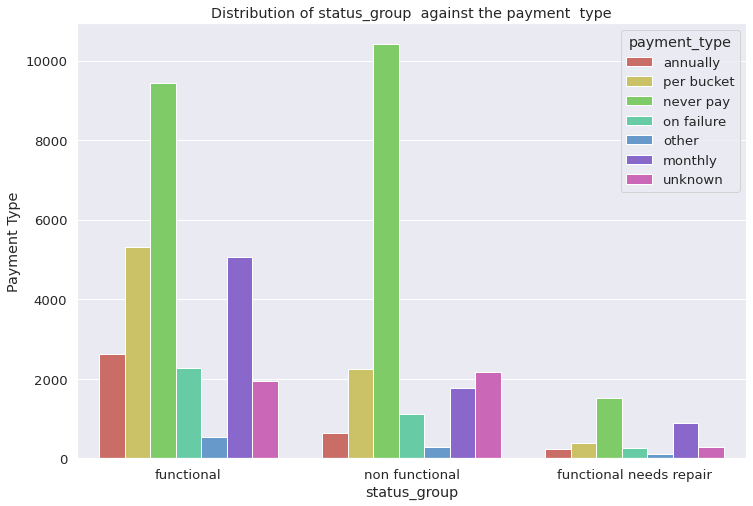

In [57]:
# Stacked column chart for status group  against the payment type
plt.figure(figsize=(12, 8))
sns.countplot(x = df["status_group"], hue = df["payment_type"],palette = ("hls"))
plt.xlabel('status_group')
plt.ylabel('Payment Type')
plt.title('Distribution of status_group  against the payment  type') 
plt.show()

1. For most waterpoints  whether functional, faunctional need repare or non functional the type of payment used is never pay, that is water is not charged.

2. For the functional waterpoints,9732 uses never pay as payment type,5742 uses bucket payment_type ,5107 waterpoints uses monthly payment,2661 uses annuall payments.

3. For functional needs repair wataerpoints,1527 uses neverpay payment type,898 uses minthly,383 uses bucket payment type .

4. For the nonfunctional waterpoints,10791 uses never pay type of payment,1793 uses monthly type and 2406 uses bucket

6. **Relationship between the status group and the scheme management.**


In [58]:
pd.crosstab(df['status_group'], df['scheme_management'])

scheme_management,Company,None,Other,Parastatal,Private operator,SWC,Trust,VWC,WUA,WUG,Water Board,Water authority
status_group,,,,,,,,,,,,
functional,509,1,197,730,499,20,45,17291,1953,2473,1955,1505
functional needs repair,35,0,13,171,23,1,5,2024,230,625,103,438
non functional,486,0,171,400,285,76,21,13883,614,1157,553,986


1. **17833** functional waterpoints are under the management of **VWC**,**2941** functional waterpoints are under the management of **WUG**,**1987** are under Board,**1965** are under **WUA** and **1519** are under **Authority** management.

2. For the functional but needs repair waterpoints, **2091** are under the management of **VWC**,**664** are under **WUG**,441 are under **Authority**

3,. Most waterpoints managed by SWC are non-functional

## Data pre-processing

In [59]:
# label encoding 
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()

df['status_group']=en.fit_transform(df['status_group'])

In [60]:
# selecting categorical columns
model=df.copy()
new=model.iloc[:,[1,2,5,16,17,19,21,22,23,24,25,26,27,28,29,30,31]]
new.head()

,status_group,amount_tsh,gps_height,population,scheme_management,permit,extraction_type,extraction_type_class,management,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type
0,0,6000.0,1390,109,VWC,False,gravity,gravity,vwc,user-group,annually,soft,good,enough,spring,groundwater,communal standpipe
2,0,25.0,686,250,VWC,True,gravity,gravity,vwc,user-group,per bucket,soft,good,enough,dam,surface,communal standpipe multiple
3,2,0.0,263,58,VWC,True,submersible,submersible,vwc,user-group,never pay,soft,good,dry,borehole,groundwater,communal standpipe multiple
5,0,20.0,0,1,VWC,True,submersible,submersible,vwc,user-group,per bucket,salty,salty,enough,other,unknown,communal standpipe multiple
6,2,0.0,0,0,VWC,True,swn 80,handpump,vwc,user-group,never pay,soft,good,enough,borehole,groundwater,hand pump


In [61]:
categorical=new.drop(['amount_tsh','gps_height','population','status_group'],1)

In [62]:
from sklearn.preprocessing import LabelEncoder
en=LabelEncoder()
categorical_encoded=categorical.apply(en.fit_transform)
new_df=categorical_encoded.join(df[['amount_tsh','gps_height','population','status_group']])
new_df=pd.DataFrame(new_df)
new_df.head()

,scheme_management,permit,extraction_type,extraction_type_class,management,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type,amount_tsh,gps_height,population,status_group
0,7,0,3,0,7,4,0,6,2,1,6,0,1,6000.0,1390,109,0
2,7,1,3,0,7,4,5,6,2,1,1,1,2,25.0,686,250,0
3,7,1,14,5,7,4,2,6,2,0,0,0,2,0.0,263,58,2
5,7,1,14,5,7,4,5,4,4,1,2,2,2,20.0,0,1,0
6,7,1,15,1,7,4,2,6,2,1,0,0,4,0.0,0,0,2


In [63]:
new_df.head()

,scheme_management,permit,extraction_type,extraction_type_class,management,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type,amount_tsh,gps_height,population,status_group
0,7,0,3,0,7,4,0,6,2,1,6,0,1,6000.0,1390,109,0
2,7,1,3,0,7,4,5,6,2,1,1,1,2,25.0,686,250,0
3,7,1,14,5,7,4,2,6,2,0,0,0,2,0.0,263,58,2
5,7,1,14,5,7,4,5,4,4,1,2,2,2,20.0,0,1,0
6,7,1,15,1,7,4,2,6,2,1,0,0,4,0.0,0,0,2


In [64]:
numerical = new_df["status_group"]

In [65]:
features=new_df.iloc[:, :16]

In [66]:
features.head()

,scheme_management,permit,extraction_type,extraction_type_class,management,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type,amount_tsh,gps_height,population
0,7,0,3,0,7,4,0,6,2,1,6,0,1,6000.0,1390,109
2,7,1,3,0,7,4,5,6,2,1,1,1,2,25.0,686,250
3,7,1,14,5,7,4,2,6,2,0,0,0,2,0.0,263,58
5,7,1,14,5,7,4,5,4,4,1,2,2,2,20.0,0,1
6,7,1,15,1,7,4,2,6,2,1,0,0,4,0.0,0,0


In [67]:
features

,scheme_management,permit,extraction_type,extraction_type_class,management,management_group,payment_type,water_quality,quality_group,quantity,source_type,source_class,waterpoint_type,amount_tsh,gps_height,population
0,7,0,3,0,7,4,0,6,2,1,6,0,1,6000.0,1390,109
2,7,1,3,0,7,4,5,6,2,1,1,1,2,25.0,686,250
3,7,1,14,5,7,4,2,6,2,0,0,0,2,0.0,263,58
5,7,1,14,5,7,4,5,4,4,1,2,2,2,20.0,0,1
6,7,1,15,1,7,4,2,6,2,1,0,0,4,0.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,10,1,3,0,9,4,5,6,2,1,6,0,1,10.0,1210,125
59396,7,1,3,0,7,4,0,6,2,1,4,1,1,4700.0,1212,56
59397,7,0,15,1,7,4,1,1,1,1,0,0,4,0.0,0,0
59398,7,1,8,1,7,4,2,6,2,2,5,0,4,0.0,0,0


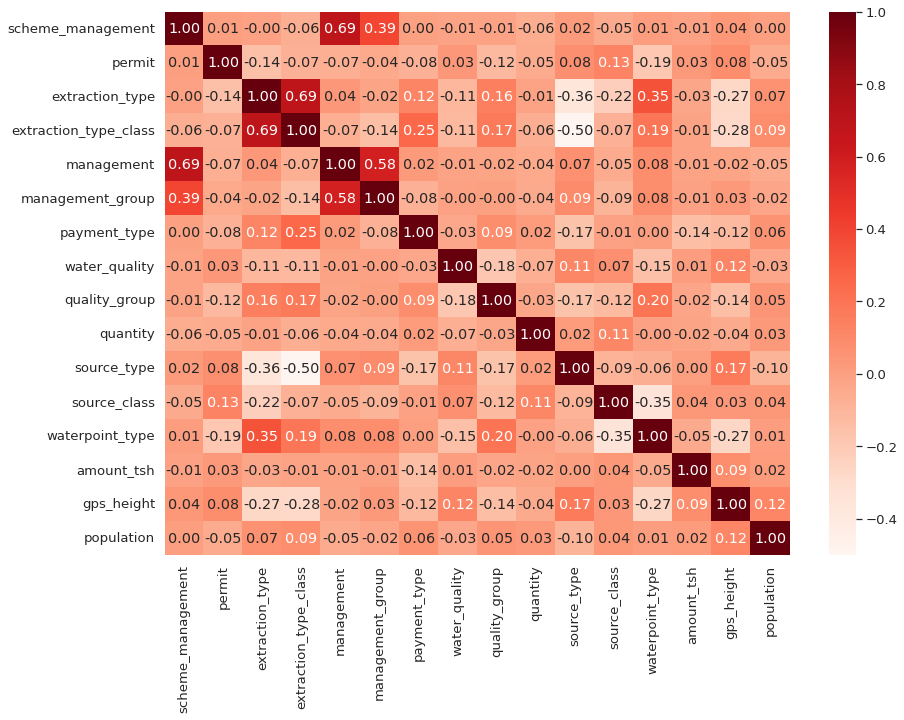

In [68]:
#Plotting a heat map to show correlation between the different variables
plt.figure(figsize=(14,10))
sns.heatmap(features.corr(),annot=True,cmap="Reds",fmt=".2f");
plt.show()

In [69]:
features=features.drop(['extraction_type_class','management','scheme_management'], 1)

In [70]:
numerical.head()

0    0
2    0
3    2
5    0
6    2
Name: status_group, dtype: int64

## LDA

In [71]:
feat=features #dependent variables
label=numerical # target variable 

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
en=LDA()

lda=en.fit(feat,label)
lda_feat=en.transform(feat)

lda.coef_

feat_imp=pd.DataFrame(index=feat.columns.values, data=lda.coef_[0].T)
feat_imp.sort_values(0,ascending=False)

,0
quantity,0.155340
permit,0.036141
source_type,0.015258
payment_type,0.002552
gps_height,0.000117
population,0.000023
amount_tsh,0.000017
extraction_type,-0.003051
management_group,-0.003071
water_quality,-0.027826


In [72]:
dataset = features[['quantity','gps_height','amount_tsh','source_type','population','permit']] # Selected Variables after LDA

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

scaled=scaler.fit_transform(dataset)

In [74]:
scaled=pd.DataFrame(scaled, index=dataset.index, columns=dataset.columns)

In [75]:
scaled

,quantity,gps_height,amount_tsh,source_type,population,permit
0,-0.390605,1.007903,2.013636,0.916259,-0.137579,-1.474555
2,-0.390605,0.000375,-0.117639,-1.373880,0.163464,0.678171
3,-1.692570,-0.605001,-0.126557,-1.831907,-0.246467,0.678171
5,-0.390605,-0.981393,-0.119423,-0.915852,-0.368165,0.678171
6,-0.390605,-0.981393,-0.126557,-1.831907,-0.370300,0.678171
...,...,...,...,...,...,...
59395,-0.390605,0.750297,-0.122990,0.916259,-0.103418,0.678171
59396,-0.390605,0.753159,1.549928,0.000204,-0.250737,0.678171
59397,-0.390605,-0.981393,-0.126557,-1.831907,-0.370300,-1.474555
59398,0.911360,-0.981393,-0.126557,0.458231,-0.370300,0.678171


In [76]:
data_frame = scaled.join(new['status_group'])
data_frame.head()

,quantity,gps_height,amount_tsh,source_type,population,permit,status_group
0,-0.390605,1.007903,2.013636,0.916259,-0.137579,-1.474555,0
2,-0.390605,0.000375,-0.117639,-1.373880,0.163464,0.678171,0
3,-1.692570,-0.605001,-0.126557,-1.831907,-0.246467,0.678171,2
5,-0.390605,-0.981393,-0.119423,-0.915852,-0.368165,0.678171,0
6,-0.390605,-0.981393,-0.126557,-1.831907,-0.370300,0.678171,2


## Factor Analysis

Factor Analyzer

Before we conduct factor analysis, we need to check that our dataset is factorable.

To do this we will conduct Bartlett’s test of sphericity which compares an observed correlation matrix with the identity matrix

Null: Variables are not correlated i.e. not factorable

Alt: Variables are correlated enough i.e factorable

In [77]:
!pip install factor_analyzer==0.2.3

In [78]:
# Importing Bartlett's test
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity

# Conducting the test
chi_square_value,p_value=calculate_bartlett_sphericity(new_df)
p_value

0.0

Our p value is less than 0.05 therefore we reject the null hypothesis and conclude that our variables are factorable

The second test is the Kaiser-Meyer-Olkin (KMO) Test which measures the suitability of data for factor analysis.

A KMO value of less than 0.6 is considered inadequate.

In [79]:
# Importing the KMO test
from factor_analyzer.factor_analyzer import calculate_kmo

# Conducting the test
kmo_all,kmo_model=calculate_kmo(new_df)

In [80]:
# Finding out our results
kmo_model

0.6538342318609914

In [81]:
# Importing factor analysis

from factor_analyzer.factor_analyzer import FactorAnalyzer

# Performing factor analysis
fa = FactorAnalyzer()
fa.analyze(new_df, 10, rotation=None)

# Checking the Eigenvalues
ev, v = fa.get_eigenvalues()
ev

,Original_Eigenvalues
0,2.759485
1,2.194116
2,1.388957
3,1.176015
4,1.135993
5,1.065515
6,1.028025
7,0.941842
8,0.883308
9,0.782981


The overall KMO for our dataset is 0.65383 which is adequate

Kaiser proposed that a KMO > 0.9 was marvelous, in the 0.80s, meritorious, in the 0.70s, middling, in the 0.60s, mediocre, in the 0.50s, miserable, and less than 0.5 would be unacceptable.


To determine the number of factors we will use the kaiser rule which is to drop all components with eigenvalues under 1.0.


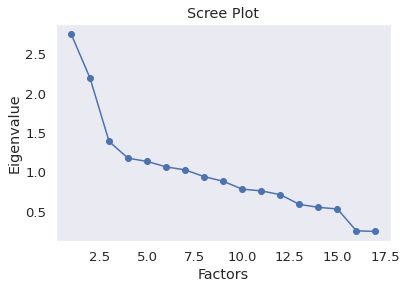

In [82]:
# Creating the scree plot
plt.scatter(range(1,new_df.shape[1]+1),ev)
plt.plot(range(1,new_df.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [83]:
# Performing factor analysis
fa = FactorAnalyzer()
fa.analyze(new_df, 7, rotation="varimax")
# Showing our factor loadings
# Factor loadings indicate how much a factor explains a variable
fa.loadings

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7
scheme_management,0.001842,0.692095,-0.012587,0.012778,-0.024067,0.045532,-0.016129
permit,-0.063884,-0.040524,-0.192595,-0.073554,-0.067712,-0.009901,-0.202824
extraction_type,0.754540,0.015046,0.361462,0.004890,0.027328,-0.057673,0.111760
extraction_type_class,0.868701,-0.090286,0.063264,0.118021,-0.121532,-0.019843,0.132926
management,0.010266,0.996798,0.035273,0.050153,0.048841,-0.063661,-0.014635
management_group,-0.100330,0.580357,0.097727,-0.053903,-0.036153,-0.019951,0.038236
payment_type,0.172417,-0.017755,-0.033007,0.860881,0.008136,0.090015,0.041936
water_quality,-0.079485,-0.011949,-0.054007,-0.012712,-0.075619,0.007832,-0.308257
quality_group,0.098049,-0.014691,0.095042,0.062799,-0.109653,0.022276,0.453000
quantity,-0.026160,-0.062591,-0.047757,0.017771,0.567896,-0.018346,0.089408


In [84]:
# Getting variance of each factors
fa.get_factor_variance()

,Factor1,Factor2,Factor3,Factor4,Factor5,Factor6,Factor7
SS Loadings,1.767746,1.839040,0.885042,0.824365,0.462986,0.510139,0.716286
Proportion Var,0.103985,0.108179,0.052061,0.048492,0.027234,0.030008,0.042134
Cumulative Var,0.103985,0.212164,0.264225,0.312717,0.339952,0.369960,0.412094


A total 41% cumulative variance is explained by our 7 factors

# Modelling

In [85]:
# Defining our feature and target variables.
X = scaled
y = numerical 

In [86]:
X

,quantity,gps_height,amount_tsh,source_type,population,permit
0,-0.390605,1.007903,2.013636,0.916259,-0.137579,-1.474555
2,-0.390605,0.000375,-0.117639,-1.373880,0.163464,0.678171
3,-1.692570,-0.605001,-0.126557,-1.831907,-0.246467,0.678171
5,-0.390605,-0.981393,-0.119423,-0.915852,-0.368165,0.678171
6,-0.390605,-0.981393,-0.126557,-1.831907,-0.370300,0.678171
...,...,...,...,...,...,...
59395,-0.390605,0.750297,-0.122990,0.916259,-0.103418,0.678171
59396,-0.390605,0.753159,1.549928,0.000204,-0.250737,0.678171
59397,-0.390605,-0.981393,-0.126557,-1.831907,-0.370300,-1.474555
59398,0.911360,-0.981393,-0.126557,0.458231,-0.370300,0.678171


In [87]:
y

0        0
2        0
3        2
5        0
6        2
        ..
59395    0
59396    0
59397    0
59398    0
59399    0
Name: status_group, Length: 49478, dtype: int64

In [88]:
# Fixing the class imbalance in our target variable using the smote technique.
from imblearn.over_sampling import SMOTE

X,y=SMOTE().fit_resample(X,y)

We used SMOTE Oversampling to deal with the class imbalance in our target variable because of the following reasons; 
1. We have one minority class from the 3 class and SMOTE Oversampling generates synthetic samples that specifically caters to our minority class
2. This algorithm overcomes the overfitting problem that comes with random Oversampling 


In [89]:
y

0        0
1        0
2        2
3        0
4        2
        ..
81529    2
81530    2
81531    2
81532    2
81533    2
Name: status_group, Length: 81534, dtype: int64

In [90]:
y.value_counts()

0    27178
2    27178
1    27178
Name: status_group, dtype: int64

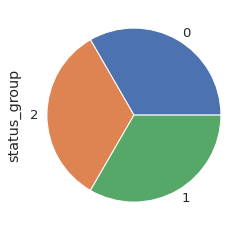

In [91]:
y.value_counts().plot(kind='pie')

In [92]:
# Splitting our data into the train and test sets.

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

By default, logistic regression cannot be used for classification tasks that have more than two class labels; multi-class classification.

It requires modification in order to support multi-class classification problems

A popular approach for adapting logistic regression to multi-class classification problems is to split the multi-class classification problem into multiple binary classification problems and fit a standard logistic regression model on each subproblem. Techniques of this type include one-vs-rest and one-vs-one wrapper models.

In [93]:
# Importing the Logistic Regression algorithm since this is a multinomial classification challenge 

from sklearn.linear_model import LogisticRegression

In [94]:
model = LogisticRegression(penalty='l2', dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, 
random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)

For small datasets, ‘liblinear’ is a good choice

‘sag’ and ‘saga’ are faster for large ones - our dataset is neither to large or too small

For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes

l2 is the penalty term, apart from being the defaut term, it works well with 'lbfgs'

In [95]:
model.fit(X_train, y_train)

LogisticRegression()

In [96]:
# Making our prediction using our trained model.

y_pred=model.predict(X_test)
y_pred

array([2, 0, 0, ..., 2, 2, 0])

In [97]:
# Evaluating the model.

from sklearn.metrics import accuracy_score, confusion_matrix, explained_variance_score,classification_report

print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.4312579207718409
[[3315 1704 3112]
 [3011 2504 2632]
 [1587 1866 4730]]
-0.7011055720396773
              precision    recall  f1-score   support

           0       0.42      0.41      0.41      8131
           1       0.41      0.31      0.35      8147
           2       0.45      0.58      0.51      8183

    accuracy                           0.43     24461
   macro avg       0.43      0.43      0.42     24461
weighted avg       0.43      0.43      0.42     24461



In [98]:
# Optimizing the model.

from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
param_grid = [{'penalty': ['l1', 'l2'], 
               'C': np.logspace(0, 4, 5),
               'solver' : ['lbfgs', 'newton-cg', 'liblinear','saga'],
               'max_iter' : [5, 10]
               }
              ]

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(model, param_grid = param_grid, cv=5, verbose=0, scoring = 'accuracy')

In [99]:
import warnings
warnings.filterwarnings("ignore")
# Fitting grid search
best_clf = clf.fit(X_train, y_train)
#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)
print('Best Penalty:', best_clf.best_estimator_.get_params()['penalty'])
print('Best C:', best_clf.best_estimator_.get_params()['C'])
print('Best Solver:', best_clf.best_estimator_.get_params()['solver'])
print('Best max_iter:', best_clf.best_estimator_.get_params()['max_iter'])
print('best_score',best_clf.best_score_)

Best Penalty: l1
Best C: 1000.0
Best Solver: saga
Best max_iter: 5
best_score 0.4336725775210086


In [100]:
lr=LogisticRegression(penalty='l2',C=1,solver='lbfgs',max_iter=5, random_state=0)
lr.fit(X_train,y_train)

LogisticRegression(C=1, max_iter=5, random_state=0)

In [101]:
y_pred=lr.predict(X_test)


In [102]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.43129880217489064
[[3396 1695 3040]
 [3094 2497 2556]
 [1666 1860 4657]]
-0.707626683653505
              precision    recall  f1-score   support

           0       0.42      0.42      0.42      8131
           1       0.41      0.31      0.35      8147
           2       0.45      0.57      0.51      8183

    accuracy                           0.43     24461
   macro avg       0.43      0.43      0.42     24461
weighted avg       0.43      0.43      0.42     24461



In [103]:
print(f'Train Accuracy: {lr.score(X_train, y_train):.2f}')
print(f'Test Accuracy: {lr.score(X_test, y_test):.2f}')

Train Accuracy: 0.43
Test Accuracy: 0.43


In [104]:
# predicting using logistic regression
y_pred =np.round(lr.predict(X_test),decimals=1)
y_pred

array([2, 0, 0, ..., 2, 2, 0])

In [105]:
#comparing the actual values verses the predicted ones
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame

,Actual,Predicted
71453,1,2
78923,2,0
68430,1,0
4402,0,0
70115,1,0
...,...,...
14930,2,2
60749,1,0
36625,0,2
13618,2,2


# Random Forest

In [106]:
from sklearn.ensemble import RandomForestClassifier
classifier_rf = RandomForestClassifier(random_state=42, n_jobs=-1, max_depth=5,
                                       n_estimators=100, oob_score=True)



In [107]:
# modell fitting
classifier_rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [108]:
# model evaluation

classifier_rf.oob_score_

0.5547456765896308

### hyperpateter tuning

In [109]:
# grid search cv
from sklearn.model_selection import GridSearchCV

In [110]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5,10,20,50,100,200],
    'n_estimators': [10,25,30,50,100,200]
}


In [111]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="accuracy")

In [112]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 180 candidates, totalling 720 fits
CPU times: user 24.9 s, sys: 1.95 s, total: 26.9 s
Wall time: 13min 33s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100, 200],
                         'n_estimators': [10, 25, 30, 50, 100, 200]},
             scoring='accuracy', verbose=1)

In [113]:
grid_search.best_score_

0.6846144519154694

In [114]:
# extrzcting best params
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=20, min_samples_leaf=5, n_estimators=200,
                       n_jobs=-1, random_state=42)

In [115]:
# making predictions
y_pred =np.round(lr.predict(X_test),decimals=1)
y_pred

array([2, 0, 0, ..., 2, 2, 0])

In [116]:
#comparing the actual values verses the predicted ones
comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

comparison_frame

,Actual,Predicted
71453,1,2
78923,2,0
68430,1,0
4402,0,0
70115,1,0
...,...,...
14930,2,2
60749,1,0
36625,0,2
13618,2,2


# Support Vector Classifier

Parameters

In [119]:
from sklearn.svm import SVC
svm= SVC(C=1, kernel ="rbf",gamma='scale',degree=3, random_state=None)
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.5514492457381137

# KNN

In [134]:
# Fitting our KNN classifier

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
print(knn.score(X_train, y_train))
print(classification_report(y_test,y_pred))


0.721619680058872
              precision    recall  f1-score   support

           0       0.60      0.61      0.60      8131
           1       0.68      0.76      0.72      8147
           2       0.72      0.62      0.67      8183

    accuracy                           0.66     24461
   macro avg       0.67      0.66      0.66     24461
weighted avg       0.67      0.66      0.66     24461



In [136]:
# hyper parameter tuning using random search
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
neighbor_range = np.arange(1, 41)
knn = KNeighborsClassifier()

params = {'n_neighbors' : neighbor_range,
         'weights' : ['uniform', 'distance'],
         'metric' : ['manhattan', 'euclidean', 'minkowski','hamming']}

kfolds = KFold(n_splits = 5)
rscv = RandomizedSearchCV(knn, params, random_state = 0)
rscv.fit(X_train, y_train)
print("Best parameters:", rscv.best_params_)


Best parameters: {'weights': 'distance', 'n_neighbors': 32, 'metric': 'manhattan'}


In [137]:
#using the best parameters
knn1=KNeighborsClassifier(n_neighbors=32, weights="distance", metric='manhattan')
knn1.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=32, weights='distance')

In [139]:
# Checking for overfitting.

print('Training accuracy {:.4f}'.format(knn1.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(knn1.score(X_test,y_test)))

Training accuracy 0.8466
Testing accuracy 0.6722


In [147]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6630145946608887
[[4984 1784 1363]
 [1363 6163  621]
 [2007 1105 5071]]
              precision    recall  f1-score   support

           0       0.60      0.61      0.60      8131
           1       0.68      0.76      0.72      8147
           2       0.72      0.62      0.67      8183

    accuracy                           0.66     24461
   macro avg       0.67      0.66      0.66     24461
weighted avg       0.67      0.66      0.66     24461



# Neural Network

In [150]:
from sklearn.neural_network import MLPClassifier
# Creating our model
mlp = MLPClassifier()

#fitting the model 

mlp.fit(X_train, y_train)



MLPClassifier()

In [152]:
#predicting using the model.
y_pred = mlp.predict(X_test)
y_pred

array([1, 2, 2, ..., 1, 2, 2])

In [158]:
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.5830914516986223
[[4402 2042 1687]
 [2081 4988 1078]
 [1861 1449 4873]]
              precision    recall  f1-score   support

           0       0.53      0.54      0.53      8131
           1       0.59      0.61      0.60      8147
           2       0.64      0.60      0.62      8183

    accuracy                           0.58     24461
   macro avg       0.58      0.58      0.58     24461
weighted avg       0.58      0.58      0.58     24461



In [159]:
# tuning the model
param_grid = {
          'alpha': [0.0001, 0.05],
          'learning_rate': ['constant','adaptive'],
          'solver': ['adam', 'sgd', 'lbfgs']
}

#Using the classifier along with grid search:
mlp=MLPClassifier()

#Creating grid search using 5-fold cross validation:
clf = GridSearchCV(mlp, param_grid = param_grid, cv= 5, verbose = 0, scoring = 'neg_mean_squared_error' )

#Fitting the grid search:
best_clf = clf.fit(X_train, y_train)

#Predicting values based on the new parameters:
y_pred = best_clf.predict(X_test)

In [160]:
# getting the best parameters
best_clf.best_params_

{'alpha': 0.0001, 'learning_rate': 'constant', 'solver': 'adam'}

In [161]:
#Using the best parameters from hyperparameter tuning:
Final = MLPClassifier(activation = 'identity', alpha =  0.0001, hidden_layer_sizes = (10,10,10),
                               learning_rate = 'constant', solver = 'adam',random_state=0)

In [162]:
#Fitting the model:
Final.fit(X_train,y_train )

#Predicting values:
y_pred = Final.predict(X_test)

In [163]:
# Checking for overfitting.

print('Training accuracy {:.4f}'.format(Final.score(X_train,y_train)))
print('Testing accuracy {:.4f}'.format(Final.score(X_test,y_test)))

Training accuracy 0.4307
Testing accuracy 0.4286


In [165]:
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(explained_variance_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.42860062957360695
[[3597 1450 3084]
 [3380 2187 2580]
 [1871 1612 4700]]
-0.7625704237308206
              precision    recall  f1-score   support

           0       0.41      0.44      0.42      8131
           1       0.42      0.27      0.33      8147
           2       0.45      0.57      0.51      8183

    accuracy                           0.43     24461
   macro avg       0.43      0.43      0.42     24461
weighted avg       0.43      0.43      0.42     24461

